# FEBR framework

In [1]:
!pip install gym==0.17.2
!pip install -U dopamine-rl
!pip install tensorflow-estimator==1.15.1
# !pip install recsim==0.2.4

     |████████████████████████████████| 1.6 MB 5.5 MB/s 
  Created wheel for gym: filename=gym-0.17.2-py3-none-any.whl size=1650889 sha256=b2761f3643f13359b5d3a23e5175b9d46c9d70be776d404595654bcad2319111
  Stored in directory: /root/.cache/pip/wheels/18/e1/58/89a2aa24e6c2cc800204fc02010612afdf200926c4d6bfe315
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3
     |████████████████████████████████| 147 kB 5.3 MB/s 
     |████████████████████████████████| 207 kB 30.2 MB/s 
     |████████████████████████████████| 18.3 MB 21 kB/s 
     |████████████████████████████████| 352 kB 38.5 MB/s 
     |████████████████████████████████| 118 kB 46.6 MB/s 
     |████████████████████████████████| 57 kB 5.7 MB/s 
  Attempting uninstall: dopamine-rl
    Found existing installation: dopamine-rl 1.0.5
    Uninstalling dopamine-rl-1.0.5:
      Successfully uninstalled dopamine-rl-1.0.5
     |█

In [2]:
!git clone -b T608854 https://github.com/sparsh-ai/drl-recsys.git

Cloning into 'drl-recsys'...
remote: Enumerating objects: 711, done.
remote: Counting objects: 100% (711/711), done.
remote: Compressing objects: 100% (514/514), done.
remote: Total 711 (delta 298), reused 572 (delta 179), pack-reused 0
Receiving objects: 100% (711/711), 21.81 MiB | 25.55 MiB/s, done.
Resolving deltas: 100% (298/298), done.


In [3]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [4]:
%cd /content/drl-recsys

/content/drl-recsys


## Expert Environment Test

In [ ]:
from recsim.agents import full_slate_q_agent, random_agent
from rl import *
from utils import *
from recsim.environments import interest_evolution
from recsim.simulator import runner_lib

def clicked_quality_reward(responses):
    """Calculates the total clicked watchtime from a list of responses.
    Args:
      responses: A list of IEvResponse objects
    Returns:
      reward: A float representing the total watch time from the responses
    """
    qual = 0.0
    watch = 0.0
    for response in responses:
        if response.clicked:
            qual += float(response.quality)
            watch += float(response.watch_time)
    return [qual, watch]


def create_agent_full_slate(sess, environment, eval_mode, summary_writer=None):
    kwargs = {
        'observation_space': environment.observation_space,
        'action_space': environment.action_space,
        'summary_writer': summary_writer,
        'eval_mode': eval_mode,
    }
    return full_slate_q_agent.FullSlateQAgent(sess, **kwargs)


def create_agent_random(slate_size, random_seed=0):
    action_space = spaces.MultiDiscrete(num_candidates * np.ones((slate_size,)))
    return random_agent.RandomAgent(action_space, random_seed)


def clicked_evaluation_reward(responses):
    reward = 0.0
    for response in responses:
        if response.clicked:
            if response.evaluated:
                reward += 1
    return reward


if __name__ == '__main__':

    slate_size = 2
    num_candidates = 5
    env_config = {
        'num_candidates': num_candidates,
        'slate_size': slate_size,
        'resample_documents': True,
        'seed': 0,
        'reward_function': clicked_quality_reward,
    }

    expertEnv = environment.Environment(
        ExpertModel(slate_size),
        EEVideoSampler(0),
        num_candidates,
        slate_size,
        resample_documents=True)

    lts_gym_env = recsim_gym.RecSimGymEnv(expertEnv, clicked_evaluation_reward)
    recsim_gym_env = interest_evolution.create_environment(env_config)
    observation_0 = recsim_gym_env.reset()

    for i in range(3):
        recommendation_slate_0 = [0,1]
        print(recommendation_slate_0)
        observation_1, reward, done, scores, _ = recsim_gym_env.step(recommendation_slate_0)
        print('Observation ' + str(i))
        print('Available documents')
        doc_strings = ['doc_id ' + key + str(value) for key, value
                   in observation_1['doc'].items()]
        print('\n'.join(doc_strings))
        rsp_strings = [str(response) for response in observation_1['response']]
        print('User responses to documents in the slate')
        print('\n'.join(rsp_strings))
        print('Reward: ', reward)
        print("User observation noise:", observation_1['user'][0], " interests features: ", observation_1['user'][1:])
        print("*******************************************")

[0, 1]
Observation 0
Available documents
doc_id 10[1.0 0.0 0.0 array([0.63824711]) 4.4440435711608774]
doc_id 11[1.0 0.0 0.0 array([-0.61306046]) 5.754273506962975]
doc_id 12[1.0 0.0 0.0 array([-0.83757901]) 5.061037725146993]
doc_id 13[1.0 0.0 0.0 array([0.66227429]) 4.421675016492828]
doc_id 14[1.0 0.0 0.0 array([-0.81335051]) 4.743863232745426]
User responses to documents in the slate
{'click': 0, 'watch_time': array(0.), 'liked': 0, 'quality': array([0.93608219]), 'cluster_id': 0}
{'click': 0, 'watch_time': array(0.), 'liked': 0, 'quality': array([0.80542745]), 'cluster_id': 0}
Reward:  [0.0, 0.0]
User observation noise: 0.7835460015641595  interests features:  [ 0.92732552 -0.23311696]
*******************************************
[0, 1]
Observation 1
Available documents
doc_id 15[1.0 0.0 0.0 array([-0.41573586]) 4.633674327374266]
doc_id 16[1.0 0.0 0.0 array([-0.39257533]) 5.794079073157606]
doc_id 17[1.0 0.0 0.0 array([0.10772367]) 4.094841736234199]
doc_id 18[1.0 0.0 0.0 array([-

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


## Policy Agent Test

In [ ]:
from rl import *
from utils import *
import random
from recsim.agents import full_slate_q_agent
from irl_agent import InverseRLAgent
import tensorflow.compat.v1 as tf
import time
from numpy import load


def run_one_episode(env, agent, max_steps_per_episode=100):
    observation = env.reset()
    action = agent.begin_episode(observation)
    step_number = 0
    total_watch = 0.
    total_qual = 0
    start_time = time.time()
    total_length_videos = 0
    while True:
        observation, reward, done, info, _ = env.step(action)

        for j in range(len(observation['response'])):
            if observation['response'][j]['click'] == 1:
                index = action[j]
                total_length_videos += list(observation['doc'].values())[index][-1]
                break

        # Update environment-specific metrics with responses to the slate.
        env.update_metrics(observation['response'], info)

        total_watch += reward[1]
        total_qual += reward[0]
        step_number += 1

        if done:
            break
        elif step_number == max_steps_per_episode:
            # Stop the run loop once we reach the true end of episode.
            break
        else:
            action = agent.step(reward[1], observation)

    agent.end_episode(reward[1], observation)
    time_diff = time.time() - start_time
    print("hhhhhhhhhhh",total_length_videos,"fffff",total_watch)

    return step_number, total_watch/total_length_videos, time_diff, total_qual


def clicked_quality_reward(responses):
    """Calculates the total clicked watchtime from a list of responses.
    Args:
      responses: A list of IEvResponse objects
    Returns:
      reward: A float representing the total watch time from the responses
    """
    qual = 0.0
    watch = 0.0
    for response in responses:
        if response.clicked:
            qual += float(response.quality)
            watch += float(response.watch_time)
    return [qual, watch]

if __name__ == '__main__':
    def clicked_evaluation_reward(responses):
        reward = 0.0
        for response in responses:
            if response.clicked:
                if response.evaluated:
                    reward += 1
        return reward


    slate_size = 2
    num_candidates = 5
    env_config = {
        'num_candidates': num_candidates,
        'slate_size': slate_size,
        'resample_documents': True,
        'seed': 0,
        'reward_function':clicked_quality_reward
    }

    expertEnv = environment.Environment(
        ExpertModel(slate_size),
        EEVideoSampler(1),
        num_candidates,
        slate_size,
        resample_documents=True)


    states = load('./datasets_states/statesV1.npy', allow_pickle=True)
    policy_ = load('./datasets_states/policyV1.npy', allow_pickle=True)

    lts_gym_env = recsim_gym.RecSimGymEnv(expertEnv, clicked_evaluation_reward)
    recsim_gym_env = interest_evolution.create_environment(env_config)
    agent = full_slate_q_agent.FullSlateQAgent(tf.Session(config=tf.ConfigProto(allow_soft_placement=True)),
                                               recsim_gym_env.observation_space, recsim_gym_env.action_space)

    agent_irl = InverseRLAgent(recsim_gym_env, states, policy_, num_cand=num_candidates,
                               slate_size=slate_size, max_steps_per_episode=100)

    max_episode = 5
    results = []
    for i in range(max_episode):
        # steps, watch, time_, q = run_one_episode(recsim_gym_env, agent_irl)
        steps, watch, time_, q = run_one_episode(recsim_gym_env, agent)
        results += ["episode "+str(i)+", total_steps: "+ str(steps) +", total_watch_time: "+
                    str(watch)+", time_episode: "+ str(time_) + ", total qual: ",str(q)]

    for i in results:
        print(i)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


hhhhhhhhhhh 172.05200061742357 fffff 179.84427729178574
hhhhhhhhhhh 188.04181900923018 fffff 179.48502364858095
hhhhhhhhhhh 202.739896752806 fffff 178.42501066961228
hhhhhhhhhhh 148.97083137490577 fffff 143.38210689553316
hhhhhhhhhhh 173.84591505168382 fffff 182.7688204239798
episode 0, total_steps: 60, total_watch_time: 1.0452902415920704, time_episode: 0.06558513641357422, total qual: 
-2.721573994855099
episode 1, total_steps: 62, total_watch_time: 0.9544952532062604, time_episode: 0.05964398384094238, total qual: 
-2.695258167820221
episode 2, total_steps: 64, total_watch_time: 0.8800685682855997, time_episode: 0.061174631118774414, total qual: 
-6.323811135019944
episode 3, total_steps: 91, total_watch_time: 0.9624844378742318, time_episode: 0.10259842872619629, total qual: 
-3.266558698703886
episode 4, total_steps: 57, total_watch_time: 1.051326517333716, time_episode: 0.05442523956298828, total qual: 
-0.8172815131135209


## Learned Optimal Policy, Rewards, and States

In [ ]:
from numpy import load

states_ = load('./datasets_states/statesV1.npy', allow_pickle=True)
policy_ = load('./datasets_states/policyV1.npy', allow_pickle=True)
rewards_ = load('./datasets_states/rewardsV1.npy', allow_pickle=True)

In [ ]:
states_.shape

(1000, 4)

In [ ]:
states_[0,0]

array([0.05818364, 0.32411784, 0.13608912, 0.85119328])

In [ ]:
states_[0,1]

(array([1.        , 1.        , 0.30741666, 0.02639285, 0.31419561,
        0.86100801, 4.14864279, 0.72124186]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
states_[0,2]

OrderedDict([('10',
              array([ 1.        ,  0.        ,  0.        ,  0.46011182,  0.53191715,
                      0.40239482, -0.43772614])),
             ('11',
              array([ 1.        ,  0.        ,  0.        , -0.90719082, -0.12504569,
                     -0.63124626,  0.07901337])),
             ('12',
              array([1.        , 0.        , 0.        , 0.62401961, 0.03072512,
                     0.24051272, 0.02793798])),
             ('13',
              array([ 1.        ,  0.        ,  0.        ,  0.2749133 , -0.20884942,
                     -0.27153322, -0.15221058])),
             ('14',
              array([ 1.        ,  0.        ,  0.        , -0.08599996, -0.59009538,
                      0.84052877, -0.15944298]))])

In [ ]:
states_[0,3]

False

In [ ]:
policy_.shape

(1000, 4)

In [ ]:
policy_[0,]

array([0.24931075, 0.24928152, 0.25112979, 0.25027795])

In [ ]:
rewards_.shape

(200, 1)

In [ ]:
rewards_[0]

array([0.47900888], dtype=float32)

## Model Evaluations

In [6]:
from rl import *
from recsim.agents import  full_slate_q_agent
# from irl_agent import InverseRLAgent
import time
import pickle
from utils import *
import tensorflow.compat.v1 as tf
import time
from tqdm.notebook import tqdm
from numpy import load
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
# define reward functions

def v1_clicked_evaluation_reward(responses):
    reward = 0.0
    for response in responses:
        if response.clicked:
            if response.evaluated:
                reward += 1
    return reward

def v2_clicked_evaluation_reward(responses):
    reward = 0.0
    for response in responses:
        if response.clicked:
            if response.evaluated:
                reward += int((response.accuracy_eval + response.importance_eval
                                   + response.pedagogy_eval + response.entertainment_eval) / 4)
    return reward

def clicked_engagement_reward(responses):
    reward = 0.0
    for response in responses:
        if response.clicked:
            reward += response.watch_time
    return reward

In [8]:
# useful plotting function for result visualisation

def plot_chart1(x_,y_,c, x_label, y_label):
    plt.plot(x_, y_, c)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def plot_chart2(x_,y_, x_label, y_label):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.stem(x_, y_)
    plt.show()
    
def plot_3a(t,data1,data2,axe1,axe2,ro1="ro",bo2="bo",x_="episodes"):
    # Create some mock data
    
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel(x_)
    ax1.set_ylabel(axe1, color=color)
    ax1.plot(t, data1, ro1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(axe2, color=color)  # we already handled the x-label with ax1
    ax2.plot(t, data2, bo2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [9]:
class InverseRLAgent():
    """A  recommender system agent that implements the policy learned by
    Maximum Entropy inverse reinforcement learning model."""

    def __init__(self, env, states_list, policy, num_cand, slate_size, max_steps_per_episode=100, 
                ml_model=False,filename='expert_bestModel.sav'):
        
        """
        Args:
            env: The RecSim Gym user environment, e.g. interest evolution environment
            states_list: Dataset of expert states
            policy: The learned expert policy produced by MaxEnt-IRL model
            num_cand: The size of the corpus video candidate
            slate_size: The number of recommended videos 
            max_steps_per_episode: The length of a user session (size of an episode)
            ml_model: Should be set to True in the case you want to use a classification 
                    model (learned on the dataset) for prediction. Otherwise, you use the 
                    comparaison model with similarities margins
            filename: If ml_model=True, you have to specify your serialized machine learning model

        """
        self.env = env
        self.states = states_list
        self.policy = policy
        self.list_actions = generatesIndexSlates(num_cand, slate_size)
        self.max_steps_per_episode = max_steps_per_episode
        # number of user states that matched a given expert state
        self.count = 0
        # total watch time by the expert during a user episode
        self.expert_watch = 0
        # total quality delivered by following the expert policy
        self.deleg_quality = 0

        self.deleg_q_temp = 0

        self.ml_model = ml_model

        self.loaded_model = None
        # list to save all state's qualities through a given session (episode)
        self.list_quality_videos = []
        # list to save watching time of selected videos through a given session (episode)
        self.list_watching_time = []

    def step(self, observation):

        """Receives observations of environment and returns a slate.

        Args:
        observation: A dictionary that stores all the observations including:
            - user: A list of floats representing the user's observed state
            - doc: A list of observations of document features
            - response: A vector valued response signal that represent user's
            response to each document

        Returns:
        slate: An integer array of size _slate_size, where each element is an
            index in the list of document observvations.
        """


        if not self.ml_model:
            for i in range(len(self.states)):
                if self.find_state_(observation, self.states[i], margin_score=0.5, margin_interests=0.5):
                    #print("state found ")
                    for j in self.states[i][1]:
                        if j[0] == 1:
                            self.expert_watch += j[5]
                            self.deleg_q_temp = (j[1] + j[2] + j[3] + j[4]) / 4
                            self.deleg_quality += self.deleg_q_temp

                    self.count += 1
                    return self.list_actions[np.argmax(self.policy[i])], 1
            #print("state not found")
            return self.list_actions[np.random.randint(0, len(self.list_actions), dtype=int)], 0
        else:
            self.loaded_model = pickle.load(open(filename, 'rb'))
            s = self.loaded_model.predict([observation['user']])

            return self.list_actions[int(s)], 1



    def find_state(self, user_state, expert_state, margin_features=0.1):
        for j in range(0, len(user_state)):
            if abs(user_state['user'][j] - expert_state[0][j + 1]) > margin_features:
                return False
        return True

    def find_state_(self, user_state, expert_state, margin_score=0.1, margin_interests=0.5):

        """
        Implements a simple classification algorithm to compare states accordings to some margins.
        This function could be overwritten or modified depending on what criteria or similarities 
        you want to evaluate.
        Args:
            user_state:  A list of floats representing the user's observed state from the user observation
            expert_satte: A list of floats representing the expert's observed state from the  dataset
            margin_score: to compare video's quality
            margin_interests: to compare user and expert's interests.

        Returns:
            True if the state has been found, and False if it is not;


        """

        assert (len(expert_state[0][1:]) == len(user_state['user'])
                ), 'user interests size does not match'

        for i in range(len(list(user_state['doc'].values()))):
            if not (list(user_state['doc'].values())[i][:len(expert_state[0][1:])] == list(expert_state[2].values())[i][
                                                                        :len(expert_state[0][1:])]).all():
                #print("false1 ")
                return False
        if (abs(user_state['user'][1] - expert_state[0][2]) > margin_interests):
            #print("false2 ",user_state['user'], expert_state[0])
            return False
        for i in range(len(list(user_state['doc'].values()))):
            a = np.dot(user_state['user'], list(user_state['doc'].values())[i][:len(expert_state[0][1:])]) * \
                list(user_state['doc'].values())[i][-2]
            b = np.dot(expert_state[0][1:], list(expert_state[2].values())[i][:len(expert_state[0][1:])]) * \
                (sum(list(expert_state[2].values())[i][len(expert_state[0][1:]):]) /
                len(list(expert_state[2].values())[i][len(expert_state[0][1:]):]))
            if abs(a - b) > margin_score:
                #print("false3 ", abs(a - b))
                return False
        return True

    def run_one_episode(self):

        """
        Runs one episode with the given configuration 

        Returns:

        step_number: length of the episode
        total_reward: total watching_time and quality for this episode
        time_dif: execution time of this episode
        c_found: number of user states that have been matched to expert states by the classifier
        expert_watch: total watching time by state experts for user states that are similar to those experts states
        total_clicked: number of clicked videos throughout this episode
        total_length_videos: total duration time of the clicked videos
        total_deleg_q = total quality calculated by slates recommended by the expert policy
        total_episode_q = total quality of the episode for all the clicked watched videos 

        """
        # Initialize the envronment
        observation = self.env.reset()
        action, test = self.step(observation)
        step_number = 1
        total_reward = 0.
        self.count = 0
        self.expert_watch = 0
        self.deleg_quality = 0
        total_quality_exp = 0
        total_quality_not_found = 0
        total_clicked = 0
        total_length_videos = 0
        start_time = time.time()
        c_found = 0
        while True:
            # execute the action and receives the reward and the new observation from the environment
            observation, reward, done, info, _ = self.env.step(action)
            for j in range(len(observation['response'])):
                # if the user has clicked on the video
                if observation['response'][j]['click'] == 1:
                    # user state is found ( matched to a similar expert state)
                    if test == 1:
                        c_found += 1
                        if reward != None:
                            self.list_watching_time += [reward]
                            self.list_quality_videos += [self.deleg_q_temp]
                    elif test == 0:
                        total_quality_not_found += float(observation['response'][j]['quality'])
                        if reward != None:
                            self.list_quality_videos += [float(observation['response'][j]['quality'])]
                            self.list_watching_time += [reward]
                    index = action[j]
                    total_length_videos += list(observation['doc'].values())[index][-1]

                    total_clicked += 1

                    total_reward += reward

                    break
            self.env.update_metrics(observation['response'], info)

            step_number += 1

            if done:
                break
            elif step_number == self.max_steps_per_episode:
                # Stop the run loop once we reach the true end of episode.
                break
            else:
                # receive the new slate from the agent (classifier)
                action, test = self.step(observation)

        time_diff = time.time() - start_time
        total_delga_q = self.deleg_quality/c_found
        total_episode_q = (total_quality_not_found + self.deleg_quality)/total_clicked

        return step_number, total_reward, time_diff, c_found, self.expert_watch,\
            [total_clicked, total_length_videos, total_delga_q, total_episode_q]
        

    def videos_info(self):
        """ Returns the lists of watching time and the delivered 
            quality for states of the associated episode"""
        return self.list_watching_time, self.list_quality_videos

def clicked_engagement_reward(responses):
    reward = 0.0
    for response in responses:
        if response.clicked:
            reward += response.watch_time
    return reward

### Evaluation of the AL/IRL model
In this section, we evaluate the performance of the expert policy generated by AL/IRL component, which saved for our simulation in policyV1.npy. We also use its associated states dataset stored in file statesV1.npy .

In [13]:
max_episode = 500
slate_size = 2
num_candidates = 5

env_config = {
        'num_candidates': num_candidates,
        'slate_size': slate_size,
        'resample_documents': True,
        'seed': 0,
        'reward_function':clicked_engagement_reward
    }

# User simulation environment: interest evolution model presented in the paper of SlateQ
recsim_gym_env = interest_evolution.create_environment(env_config)

# Load the learned policy from the Expert IRL model as well as the resulted/associated states
states = load('datasets_states/statesV1.npy', allow_pickle=True)
policy_ = load('datasets_states/policyV1.npy', allow_pickle=True)

# Instanciate the Expert IRL agent 
agent_irl = InverseRLAgent(recsim_gym_env, states, policy_, num_cand=num_candidates,
                               slate_size=slate_size, max_steps_per_episode=100, ml_model=False)

In [17]:
results = []
# generate independent episodes
for i in tqdm(range(max_episode)):
    steps, reward, time_, found, exp_watch, user_metrics = agent_irl.run_one_episode()
    results += [[i,steps, reward, time_, found, exp_watch, user_metrics]]

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
episodes = np.linspace(0,max_episode-1, max_episode)
user_reward = []
expert_reward = []
episode_steps = []
episode_found_state = []
episode_clicked = []
episode_videos_length = []
episode_total_quality = []
episode_expert_quality = []

for i in range(len(results)):
    episode_steps += [results[i][1]]
    user_reward += [results[i][2]]
    episode_found_state += [results[i][4]]
    expert_reward += [results[i][5]]
    episode_clicked += [results[i][6][0]]
    episode_videos_length += [results[i][6][1]]
    episode_expert_quality += [results[i][6][2]]
    episode_total_quality += [results[i][6][3]]
    
ratio_watch = [user_reward[i] for i in range(len(episode_videos_length))]

In [20]:
from numpy import save
a = results
save('results.npy', a)

The table below shows the following simulation metrics:

- #episode_steps: length of the episode ( number of states)
- #episode_match_state: number of user states that have been matched by the classification algorithm to similar expert states
- T_clicked videos: Total number of videos that have been clicked by users within the episode (session)
- T_episode_quality: total quality calculated for the episode
expert_deleg_quality: quality calculated for watched videos that belongs to states of #episode_match_state
- T_videos_length: duration of all videos watched in a given episode
- T_watching_time: Total watching time of clicked videos

> Note 1: In some episodes, T_watching_time values are greater than T_videos_length while it is supposed to be the contrary. However, this situation may happen because of some videos that are watched more than one time.

> Note 2: Metrics T_episode_quality and expert_deleg_quality gives an indea about how much it is beneficial to follow expert rated videos, which are recommended based on our approach. For instance, in the episode 0, we have 30 videos that have been seen through the expert policy of our approach. These videos are delivering a quality of 0.449174. However, for the rest 32 videos (62-30=32), which are watched by a random recommendation because their states are not matched to any expert state from the states dataset, they then led to dicrease the quality (by negative quality values) ending up by a total quality of 0.32.

In [21]:
import pandas as pd
data = np.array([episode_steps, episode_found_state,  episode_clicked, 
            episode_total_quality, episode_expert_quality, episode_videos_length, user_reward, ratio_watch])
pd.DataFrame(data, columns=np.arange(max_episode), index=["#episode_steps", "#episode_match_state",  "T_clicked videos",
                             "T_episode_quality", "expert_deleg_quality", "T_videos_length", "T_watching_time"," ratio_watching"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
#episode_steps,61,68,65,62,67,77,65,70,76,72,71,73,75,76,67,66,64,73,75,71,73,65,80,72,69,79,72,70,72,68,72,68,69,73,63,74,71,73,79,70,...,68,82,67,67,67,61,70,78,61,72,66,67,70,83,75,69,68,66,79,67,67,78,69,76,71,58,69,75,74,66,69,59,76,76,77,77,62,72,66,63
#episode_match_state,35,39,42,23,34,35,37,28,31,33,37,28,26,27,23,37,32,35,42,30,29,38,38,24,28,23,32,30,23,37,29,43,27,30,38,39,24,25,36,25,...,38,23,25,41,31,42,34,23,38,35,23,26,31,23,23,37,35,40,28,38,35,33,36,38,37,34,38,26,26,29,37,42,23,21,31,28,31,22,39,34
T_clicked videos,41,46,44,41,39,38,40,42,41,41,39,38,40,39,39,42,40,40,44,42,42,42,40,39,43,39,42,41,40,40,39,44,39,41,44,41,39,39,38,41,...,42,38,39,41,39,43,44,37,41,42,39,37,43,37,38,40,42,42,39,41,40,43,41,41,39,40,43,39,40,39,41,44,41,39,38,42,41,40,43,41
T_episode_quality,0.299843,0.354691,0.394599,0.204906,0.350798,0.474841,0.14318,0.317602,0.316289,0.410878,0.507365,0.190606,0.293284,0.373388,0.256317,0.422437,0.206978,0.360801,0.531281,0.239706,0.294687,0.408445,0.423411,0.277942,0.183268,0.556858,0.235728,0.310711,0.45599,0.494716,0.228021,0.339298,0.439354,0.368675,0.218878,0.372618,0.217298,0.191258,0.436399,0.349875,...,0.362169,0.270376,0.259044,0.41346,0.25818,0.385955,0.370869,0.295797,0.30935,0.256872,0.26818,0.394905,0.255958,0.22117,0.117542,0.526957,0.308245,0.329826,0.364788,0.52892,0.373678,0.292506,0.399867,0.351845,0.593834,0.296408,0.432395,0.31226,0.246266,0.312047,0.367513,0.265888,0.34947,0.431211,0.522788,0.143603,0.269834,0.322001,0.357019,0.4579
expert_deleg_quality,0.363066,0.444923,0.413722,0.476403,0.412945,0.490872,0.193607,0.419658,0.42454,0.435921,0.527141,0.369442,0.420617,0.564277,0.44318,0.507877,0.394124,0.483139,0.554234,0.287431,0.468968,0.455083,0.455908,0.496911,0.481508,0.82531,0.360901,0.400372,0.608932,0.510755,0.371149,0.367886,0.574236,0.385919,0.287877,0.374286,0.367137,0.36166,0.507157,0.456054,...,0.385724,0.418135,0.391478,0.41346,0.330713,0.413763,0.517257,0.54369,0.358311,0.358851,0.396832,0.444625,0.377931,0.521222,0.431481,0.556804,0.361972,0.343789,0.458006,0.525114,0.442415,0.389989,0.470778,0.342722,0.594822,0.328362,0.471178,0.317927,0.420452,0.361249,0.443204,0.311572,0.413686,0.640117,0.696584,0.398172,0.324004,0.526538,0.346447,0.459414
T_videos_length,176.52,183.263,189.15,173.261,172.135,167.987,172.898,187.158,171.066,178.061,176.495,168.764,172.28,169.486,172.529,181.146,172.231,178.569,192.171,183.392,175.822,174.279,170.97,173.445,175.198,163.2,168.579,157.616,171.444,171.078,178.979,193.668,159.019,174.698,188.552,178.901,176.252,164.49,169.042,175.385,...,181.433,168.425,159.864,172.851,167.492,181.269,185.147,156.936,184.275,172.758,173.318,166.763,180.258,160.728,161.605,173.912,185.269,179.127,155.821,178.604,165.073,187.93,193.541,188.962,180.03,179.783,176.266,157.92,167.218,168.741,175.073,179.67,177.064,179.029,169.135,192.596,169.006,184.314,181.972,176.776
T_watching_time,[178.1584398758303],[177.94306294864253],[177.06029619892888],[179.24042199220892],[170.9782080893172],[161.0500678195202],176.535,[170.74463880975188],[162.73984821300473],[166.47725056941343],[167.6682829352007],[162.74131743000947],[165.1335186684421],164.516,[167.91168418044404],[175.4574241435778],[174.91585742241023],[166.88991979584316],[167.79145078410008],[170.4808039225522],[168.56414079853553],[177.52223716495865],[160.28687363490937],[166.28741001417507],[173.58947136754057],[160.36387806598265],[170.8227823944933],[169.82910824937287],[168.1102664488724],[168.17282491279386],[164.95052074042408],[176.02280581392216],[169.68323034834512],[167.1368182934974],[178.85645062636743],[166.5798522119993],[166.4061286840412],[165.92887401522415],160.339,[168.77952061700478],...,[171.37028172

Figure below shows that the delegated expert quality values positively increase the total quality as explained in note 2 above.



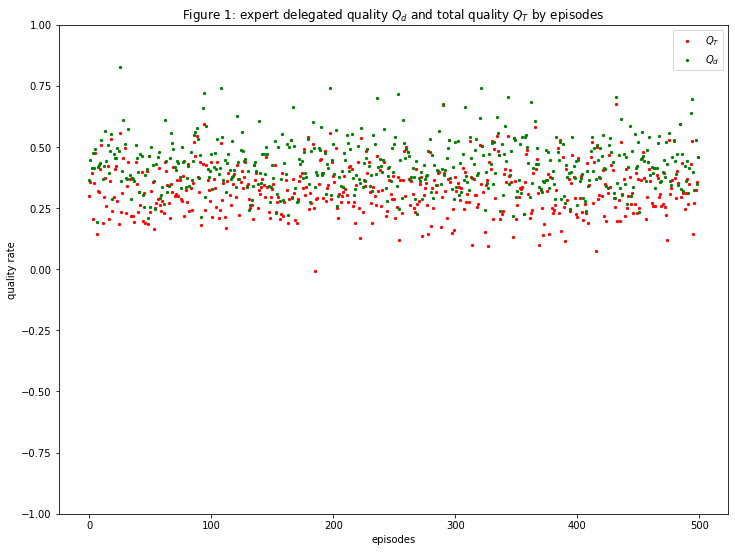

In [22]:
#plt.plot(episodes, ratio_watch, color='blue', label = "watching_time", marker='o')
plt.figure(figsize=(12,9))
plt.scatter(episodes, episode_total_quality, color='red',  s=5, label = "$Q_T$", marker='o')
plt.scatter(episodes, episode_expert_quality, color='green', s=5, label = "$Q_d$", marker='o')
plt.ylim(-1, 1)
#plt.xticks(np.arange(min(episodes), max(episodes)+1, 1.0))
plt.xlabel("episodes")
plt.ylabel("quality rate")
plt.legend(loc='upper right')
plt.title("Figure 1: expert delegated quality $Q_d$ and total quality $Q_T$ by episodes")
plt.savefig("q_eval.png", bbox_inches='tight')
plt.show()

## Comparison of recFEBR with the baseline methodes: recFSQ and recNaive

### Training

In [11]:
from recsim.agents import  full_slate_q_agent, random_agent
# from irl_agent import InverseRLAgent
import tensorflow.compat.v1 as tf
import time
from numpy import load


def run_one_episode(env, agent, max_steps_per_episode=100):
    observation = env.reset()
    action = agent.begin_episode(observation)
    step_number = 0
    total_watch = 0.
    q_videos = []
    w_videos = []
    total_qual = 0
    start_time = time.time()
    total_length_videos = 0
    while True:
        observation, reward, done, info, _ = env.step(action)

        for j in range(len(observation['response'])):
            if observation['response'][j]['click'] == 1:
                index = action[j]
                total_length_videos += list(observation['doc'].values())[index][-1]
                total_watch += reward[1]
                total_qual += reward[0]
                q_videos += [reward[0]]
                w_videos += [reward[1]]

        # Update environment-specific metrics with responses to the slate.
        env.update_metrics(observation['response'], info)
        step_number += 1

        if done:
            break
        elif step_number == max_steps_per_episode:
            # Stop the run loop once we reach the true end of episode.
            break
        else:
            action = agent.step(reward[1], observation)

    agent.end_episode(reward[1], observation)
    time_diff = time.time() - start_time

    return step_number, total_watch, time_diff, total_qual/step_number, q_videos, w_videos


def clicked_quality_reward(responses):
    """Calculates the total clicked watchtime from a list of responses.

    Args:
      responses: A list of IEvResponse objects

    Returns:
      reward: A float representing the total watch time from the responses
    """
    qual = 0.0
    watch = 0.0
    for response in responses:
        if response.clicked:
            qual += float(response.quality)
            watch += float(response.watch_time)
    return [qual, watch]


def create_agent_random(slate_size, random_seed=0):
    action_space = spaces.MultiDiscrete(num_candidates * np.ones((slate_size,)))
    return random_agent.RandomAgent(action_space, random_seed)

### recNaive simulation

In [14]:
slate_size = 2
num_candidates = 5
env_config1 = {
        'num_candidates': num_candidates,
        'slate_size': slate_size,
        'resample_documents': True,
        'seed': 0,
        'reward_function':clicked_quality_reward
    }

recsim_gym_env = interest_evolution.create_environment(env_config1)
agent = create_agent_random(slate_size)
results_r = []

for i in tqdm(range(max_episode)):
    steps_r, watch, time_r, q, q_vid, w_vid = run_one_episode(recsim_gym_env, agent)
    results_r += [[i,steps_r, watch, time_r, q, q_vid, w_vid ]]
    
episode_steps_r = []
episode_ratio_watch_r = []
episode_total_quality_r = []
episodes_qv = []
episodes_wv = []

  0%|          | 0/500 [00:00<?, ?it/s]

In [15]:
for i in tqdm(range(len(results_r))):
    episode_steps_r += [results_r[i][1]]
    episode_ratio_watch_r += [results_r[i][2]]
    episode_total_quality_r += [results_r[i][4]]
    episodes_qv += [results_r[i][5]]
    episodes_wv += [results_r[i][6]]

  0%|          | 0/500 [00:00<?, ?it/s]

### recFSQ simulation

In [17]:
slate_size = 2
num_candidates = 5
env_config1 = {
        'num_candidates': num_candidates,
        'slate_size': slate_size,
        'resample_documents': True,
        'seed': 0,
        'reward_function':clicked_quality_reward
    }

recsim_gym_env = interest_evolution.create_environment(env_config1)
results_f = []

with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
    
    agent = full_slate_q_agent.FullSlateQAgent(sess, recsim_gym_env.observation_space, recsim_gym_env.action_space)
    
    for i in tqdm(range(max_episode)):
        steps_f, watch, time_f, q, q_vid, w_vid = run_one_episode(recsim_gym_env, agent)
        results_f += [[i, steps_f, watch, time_f, q, q_vid, w_vid]]
        sess.run(tf.global_variables_initializer())
    
episode_steps_f = []
episode_ratio_watch_f = []
episode_total_quality_f = []
episodes_qvf = []
episodes_wvf = []

  0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
for i in tqdm(range(len(results_f))):
    episode_steps_f += [results_f[i][1]]
    episode_ratio_watch_f += [results_f[i][2]]
    episode_total_quality_f += [results_f[i][4]]
    episodes_qvf += [results_f[i][5]]
    episodes_wvf += [results_f[i][6]]

  0%|          | 0/500 [00:00<?, ?it/s]

### Statistics and comparison

C:\Program Files\Python\Python37\Lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


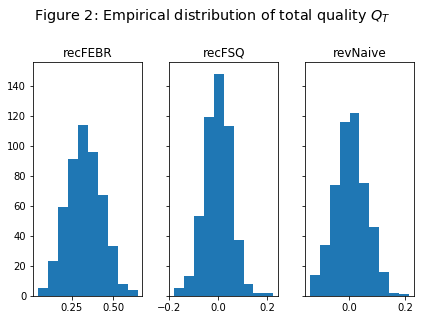

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_bins = 10

# Generate a normal distribution, center at x=0 and y=5

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(episode_total_quality, bins=n_bins)
axs[0].set_title("recFEBR")
axs[1].hist(episode_total_quality_f, bins=n_bins)
axs[1].set_title("recFSQ")
axs[2].hist(episode_total_quality_r, bins=n_bins)
axs[2].set_title("revNaive")
st=fig.suptitle("Figure 2: Empirical distribution of total quality $Q_T$", fontsize="x-large")
st.set_y(1.1)

In [ ]:
import pandas as pd
data_quality = [sum(episode_total_quality_f) / max_episode, sum(episode_total_quality_r) / max_episode, sum(episode_total_quality) / max_episode]
data_watch_time = [sum(episode_ratio_watch_f), sum(episode_ratio_watch_r), float(sum(user_reward))]
data = np.array([data_quality, data_watch_time])
pd.DataFrame(data, columns=["recFSQ", "recNaive", "recFEBR"], index=["Average total quality $Q_T$","Total watching time $W_T$"])

,recFSQ,recNaive,recFEBR
Average total quality $Q_T$,-0.001319,0.004825,0.326880
Total watching time $W_T$,85507.750344,85076.328869,85378.299611


In [ ]:
df_quality = pd.DataFrame([episode_total_quality, episode_total_quality_f, episode_total_quality_r], index=["FEBR","Full_Q","Naive_random_"])
data1 = df_quality.T
data1.describe()

,FEBR,Full_Q,Naive_random_
count,500.000000,500.000000,500.000000
mean,0.326880,-0.001319,0.004825
std,0.102646,0.055119,0.056879
min,0.046053,-0.179261,-0.141012
25%,0.255537,-0.037877,-0.033508
50%,0.329900,-0.002137,0.004459
75%,0.398835,0.034890,0.042109
max,0.646685,0.225735,0.213905


Text(0.5, 1.0, 'Figure 3: Comparison of the total watch time $W_T$ (seconds)')

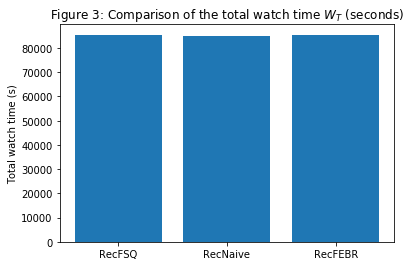

In [ ]:
name_file = "w_t_compar.png"
approaches = ["RecFSQ","RecNaive", "RecFEBR"]
plt.bar(approaches, data[1])
plt.ylabel('Total watch time (s)')
plt.title("Figure 3: Comparison of the total watch time $W_T$ (seconds)")
# saving file into result folder
#plt.savefig("../eval_results/"+name_file,, bbox_inches='tight')

Text(0.5, 1.0, 'Figure 4: Comparison of the average total quality $Q_T$ ')

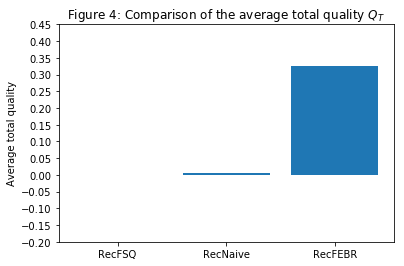

In [ ]:
name_file = "q_t_compar.png"
plt.bar(approaches, data[0])
plt.ylabel('Average total quality')
plt.yticks(np.arange(-0.2, 0.5, 0.05))
plt.title("Figure 4: Comparison of the average total quality $Q_T$ ")
# saving file into result folder
#plt.savefig("../eval_results/"+name_file, bbox_inches='tight')